In [451]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# first used in exercise two
import pca
from sklearn import preprocessing # for scale

# first used in exercise three
import coorddescent as cd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split

In [137]:
import importlib
importlib.reload(pca)

<module 'pca' from '/Users/andrewenfield/work/github/Data558/Week05/pca.py'>

Note: Per the request in the "Collaboration policy" note, I've discussed at least part of this assignment with many of the MS employees in the class, including Amitabh, Abhishek, Geoff, Suman, Charles, and Salik. (Different weeks/different assignments have different people, depending upon who attends our study groups, but I'll probably just include this blurb w/ each homework since it's generally correct.) I've also gotten input from the discussion board.

# Exercise One

**TODO**

# Exercise Two

*"(a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Hint: There are a number of functions in numpy that you can use to generate data. One example is the numpy.random.normal() func- tion; numpy.random.uniform() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes."*

A quick note: I had a hard time getting the algorithm to converge when I used very small mean shifts of 0.5 - I tried a lot of different step size value combinations and got nothing but non-convergence. I was able to get it to converge with a larger mean shift, so I'm going with that larger mean shift here.

In [514]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=30) 
print(faces.target_names)  # Images of 34 different people
print(faces.images.shape)  # 2370 images, each of which is 62x47 pixels
print(faces.data.shape)    # Each image is unravelled to a vector of size 2914

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']
(2370, 62, 47)
(2370, 2914)


In [515]:
mean_vals = [0, 10, 20]
np.random.seed(42)
d = pd.DataFrame(np.vstack([np.random.normal(mean, 
                        size=(20,50)) for mean in mean_vals]))
d.insert(0, 'Class', np.repeat(['A','B','C'], 20))
d[:1]

,Class,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,A,0.496714,-0.138264,0.647689,1.52303,-0.234153,-0.234137,1.579213,0.767435,-0.469474,...,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.76304


In [516]:
d_values = d.values[:, 1:51].astype('float')
d_values_centered = preprocessing.scale(d_values, with_std=False)
d_values_centered[0]

array([ -9.47652431, -10.36087989,  -9.29538686,  -8.58559277,
       -10.16925639, -10.28390443,  -8.43284888,  -9.41223556,
       -10.46780705,  -9.85403586, -10.39694444, -10.58329323,
        -9.84789351, -11.77688128, -12.0374925 , -10.61884412,
       -11.00006027,  -9.6519797 , -10.75006323, -11.58583051,
        -8.81179199, -10.29558276,  -9.91366629, -11.39948789,
       -10.70784122,  -9.85670811, -11.13090521,  -9.8084079 ,
       -10.73701623, -10.46793313, -10.56025456,  -7.99222798,
        -9.95515398, -11.09243514,  -9.20584621, -11.29344291,
        -9.73924429, -11.91219899, -11.31890736,  -9.77094352,
        -9.32654553,  -9.90398641, -10.16759232, -10.2470722 ,
       -11.37186667, -10.72705805, -10.23186415,  -8.66765149,
        -9.90986555, -11.76248424])

In [560]:
#X = faces.data
#eta_0, t_0, epoch_count = .00001, 1, 50

X = d_values
eta_0, t_0, epoch_count = 0.001, 2, 100

*"(b) Run your own normalized Oja algorithm on the 60 observations. You should try to implement the algorithm yourself, but you may look back at the labs if you need help. Plot the first two principal component score vectors. Compare your results to the ones obtained with scikit-learn’s PCA algorithm. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then you’re done and you can launch the computations on AWS. If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes."*

In [561]:
#bar = pca.oja_fit(d_values_centered_copy, 1, 0.001, 2, 100)
#bar[0]

In [562]:
pca_sklearn = PCA(5, svd_solver='full')
pca_sklearn.fit(X)
print(pca_sklearn.components_[0])
print(pca_sklearn.components_[1])

[-0.14233391 -0.14325963 -0.1412039  -0.13801734 -0.13977184 -0.14364433
 -0.13991273 -0.14104493 -0.14228272 -0.14028026 -0.13925715 -0.14081765
 -0.1409513  -0.13850097 -0.1433206  -0.14209824 -0.13842943 -0.13647746
 -0.14296263 -0.14078382 -0.1406264  -0.14656184 -0.13859031 -0.14020859
 -0.14084239 -0.14366725 -0.14535678 -0.14170943 -0.14213593 -0.14141145
 -0.14192793 -0.14247393 -0.14370843 -0.14302147 -0.13910328 -0.14296752
 -0.14035279 -0.14268592 -0.13854042 -0.14386981 -0.14474806 -0.13853575
 -0.14457845 -0.13896695 -0.14065459 -0.14347999 -0.1421975  -0.13715082
 -0.14139857 -0.14340664]
[-0.14820248 -0.15577997 -0.02747821  0.05217483  0.09001604  0.21697314
  0.04838229  0.0579049   0.1868853   0.07290217 -0.1472483   0.10724179
 -0.21673595 -0.23128117  0.08330134  0.00877515  0.22128086  0.03809422
  0.00873939 -0.0690226   0.24575393  0.15597047  0.08329307 -0.00890795
 -0.25341302  0.06472497 -0.00552899  0.02767339 -0.23068174 -0.2512671
  0.02564334  0.17065277  

In [587]:
foo = np.array([-0.14144957, -0.14321122, -0.1395285])
foo

array([-0.14144957, -0.14321122, -0.1395285 ])

In [588]:
np.mean(np.abs(foo))

0.14139642999999999

In [593]:
np.all((abs(foo) > .139) & (abs(foo) < .145))

True

In [ ]:
v1_top3_abs_mean = np.mean(np.abs(v1[:3])
                           

In [599]:
#eta_0, t_0, epoch_count = .001, 1, 250
Z = X - np.mean(X, axis=0)  # center the data

epoch_count = 250
low_thresh = 0.139
high_thresh = 0.145

for eta_0 in [10**k for k in range(-12, 5)]:
    for t_0 in [10**k for k in range(-12, 5)]:
        print("eta_0: {}, t_0: {}".format(eta_0, t_0))
        for i in range(0,3):
            a_0 = np.random.randn(np.size(Z, 1))  # starting point
            a_0 /= np.linalg.norm(a_0, axis=0)
            v1, _ = pca.oja(copy.deepcopy(Z), a_0, eta_0, t_0, epoch_count)
            #print(v1[:3])

            Z1 = pca.deflate(Z, v1)
            v2, _ = pca.oja(copy.deepcopy(Z1), a_0, eta_0, t_0, epoch_count)
            #print(v2[:3])

            #v1_top3_abs_mean = np.mean(np.abs(v1[:3]))
            if np.all((np.abs(v1[:3]) > low_thresh) & (np.abs(v1[:3]) < high_thresh)):
            #if np.all((np.abs(v1[:3]) > low_thresh) & (np.abs(v1[:3]) < high_thresh))
            #if (0.139 < v1_top3_abs_mean) and (v1_top3_abs_mean < 0.145):
                print("{} - {}".format(v1[:3], v2[:3]))

eta_0: 1e-12, t_0: 1e-12
eta_0: 1e-12, t_0: 1e-11
eta_0: 1e-12, t_0: 1e-10
eta_0: 1e-12, t_0: 1e-09
eta_0: 1e-12, t_0: 1e-08
eta_0: 1e-12, t_0: 1e-07
eta_0: 1e-12, t_0: 1e-06
eta_0: 1e-12, t_0: 1e-05
eta_0: 1e-12, t_0: 0.0001
eta_0: 1e-12, t_0: 0.001
eta_0: 1e-12, t_0: 0.01
eta_0: 1e-12, t_0: 0.1
eta_0: 1e-12, t_0: 1
eta_0: 1e-12, t_0: 10
eta_0: 1e-12, t_0: 100
eta_0: 1e-12, t_0: 1000
eta_0: 1e-12, t_0: 10000
eta_0: 1e-11, t_0: 1e-12
eta_0: 1e-11, t_0: 1e-11
eta_0: 1e-11, t_0: 1e-10
eta_0: 1e-11, t_0: 1e-09
eta_0: 1e-11, t_0: 1e-08
eta_0: 1e-11, t_0: 1e-07
eta_0: 1e-11, t_0: 1e-06
eta_0: 1e-11, t_0: 1e-05
eta_0: 1e-11, t_0: 0.0001
eta_0: 1e-11, t_0: 0.001
eta_0: 1e-11, t_0: 0.01
eta_0: 1e-11, t_0: 0.1
eta_0: 1e-11, t_0: 1
eta_0: 1e-11, t_0: 10
eta_0: 1e-11, t_0: 100
eta_0: 1e-11, t_0: 1000
eta_0: 1e-11, t_0: 10000
eta_0: 1e-10, t_0: 1e-12
eta_0: 1e-10, t_0: 1e-11
eta_0: 1e-10, t_0: 1e-10
eta_0: 1e-10, t_0: 1e-09
eta_0: 1e-10, t_0: 1e-08
eta_0: 1e-10, t_0: 1e-07
eta_0: 1e-10, t_0: 1e-06

In [180]:
pca_sklearn = PCA(50, svd_solver='randomized')
pca_sklearn.fit(d_values_centered)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [183]:
pca_sklearn.components_[1]

array([-0.14820248, -0.15577997, -0.02747821,  0.05217483,  0.09001604,
        0.21697314,  0.04838229,  0.0579049 ,  0.1868853 ,  0.07290217,
       -0.1472483 ,  0.10724179, -0.21673595, -0.23128117,  0.08330134,
        0.00877515,  0.22128086,  0.03809422,  0.00873939, -0.0690226 ,
        0.24575393,  0.15597047,  0.08329307, -0.00890795, -0.25341302,
        0.06472497, -0.00552899,  0.02767339, -0.23068174, -0.2512671 ,
        0.02564334,  0.17065277,  0.19201366, -0.20402114,  0.12081652,
       -0.03829716,  0.02052802, -0.00479948, -0.13600818, -0.20458192,
        0.02034034, -0.00940222, -0.13363653,  0.12899377, -0.3380589 ,
        0.06794979,  0.09806946,  0.16235379,  0.01031238,  0.02908066])

# Exercise Three

*"(a) Use the numpy.random.normal() function to generate a predictor X of length n = 100, as well as a noise vector ε of length n = 100."*

In [483]:
X = np.random.normal(size=100)
e = np.random.normal(size=100)
(X.shape, e.shape)

((100,), (100,))

*"(b) Generate a response vector Y of length n = 100 according to the model Y =β0 +β1X+β2X2 +β3X3 +ε,
where β0, β1, β2, and β3 are constants of your choice. Here superscripts denote powers of X."*

I'm just choosing some coefficients.

In [309]:
b0 = 27
b1 = 11
b2 = 5
b3 = 3

In [310]:
y = b0 + (b1*X) + (b2*(X**2)) + (b3*(X**3)) + e
y.shape

(100,)

In [486]:
# and we'll make X a 100,1 array rather than a vector,
# for better use w/ sklearn functions
X = X[:, np.newaxis]
X.shape

(100, 1)

And we'll scale X and center y. 

In [322]:
X_scaled = preprocessing.scale(X)
y_centered = preprocessing.scale(y, with_std=False)

*"(c) Now fit a LASSO model to the simulated data using your own coordinate descent algorithm. Use X, X2, . . . , X10 as predictors. Set λ = 1."*

Note that I found with lambda = 1 that I didn't get close convergence for all coefficients: although some of the higher coefficients had numbers didn't jump around a huge amount, they did jump around some. That said, the lower coefficients - the first four - stayed pretty constant (and the fifth and six were zeroed out by the algorithm). (This held regardless of whether I bumped up the iterations to something like 5000.)

In [405]:
X_scaled_poly10 = PolynomialFeatures(degree=10, include_bias=False).fit_transform(X_scaled)
X_scaled_poly10.shape

(100, 10)

In [406]:
n = np.size(X_scaled_poly10, 0)
beta_init = np.zeros(np.size(X_scaled_poly10, 1))
max_iter = 1000

In [407]:
betas_rand = cd.randcoorddescent(beta_init, X_scaled_poly10, y_centered, 1, max_iter)
betas_rand[-1, :]

array([  1.10616632e+01,  -4.47876250e+00,   1.85917711e+00,
         3.58648303e+00,   2.25145468e-01,  -2.23217761e-01,
         1.10173283e-01,  -5.57980881e-02,  -2.43346606e-02,
         3.29610103e-03])

*"(d) Select the optimal value of λ on a held-out validation set using your own coordinate descent algorithm. Create plots of the error on the validation set as a function of λ for your own coordinate descent algorithm and scikit-learn’s LASSO algorithm; use different colors for the two curves. Discuss the results obtained.*

**TODO** check logic - am I thinking about it correctly and am I using the right X and y arrays in the right places?

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_poly10, y_centered, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 10), (25, 10), (75,), (25,))

In [453]:
def mse_from_beta_coefs(beta_coefs, X, y):
    return mean_squared_error(y, X.dot(beta_coefs))

In [426]:
lambdas = [10**k for k in range(-8, 5)]
lambdas

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [466]:
def mse_for_lambda_myimpl(lam, X_train, X_test, y_train, y_test):
    beta_init = np.zeros(np.size(X_train, 1))
    betas_rand = cd.randcoorddescent(beta_init, X_train, y_train, lam, max_iter)
    return(mse_from_beta_coefs(betas_rand[-1, :], X_test, y_test))

mses_myimpl = [mse_for_lambda_myimpl(lam, X_train, X_test, y_train, y_test) for lam in lambdas]
list(zip(lambdas, mses_myimpl))

[(1e-08, 15.032272951315663),
 (1e-07, 14.773063823904012),
 (1e-06, 13.831467840913424),
 (1e-05, 14.819318488287136),
 (0.0001, 12.685048854144172),
 (0.001, 12.759550988787593),
 (0.01, 16.017532813899734),
 (0.1, 15.215005983449151),
 (1, 14.703783691335966),
 (10, 12.397645417104584),
 (100, 14.161035327909318),
 (1000, 55.173252618094494),
 (10000, 71.799899794378305)]

In [467]:
def mse_for_lambda_sklearn(lam, X_train, X_test, y_train, y_test):
    results = Lasso(alpha=lam, fit_intercept=False, max_iter=10000000).fit(X_train, y_train)
    return(mse_from_beta_coefs(results.coef_, X_test, y_test))

mses_sklearn = [mse_for_lambda_sklearn(lam, X_train, X_test, y_train, y_test) for lam in lambdas]
list(zip(lambdas, mses_sklearn))

# Side note: there's opportunity for reducing duplication with the
# prev function by injecting the function that gets the coefs

[(1e-08, 25.357573773862814),
 (1e-07, 25.357483378345918),
 (1e-06, 25.356579469731113),
 (1e-05, 25.347542907902103),
 (0.0001, 25.257431056542188),
 (0.001, 24.380343700298663),
 (0.01, 14.871338640582312),
 (0.1, 11.795886450768533),
 (1, 16.108820229471213),
 (10, 98.037488521134946),
 (100, 115.42570237061494),
 (1000, 89.033241612769501),
 (10000, 176.89204544936493)]

In [469]:
mses = pd.DataFrame({'Mine': mses_myimpl,
                     'Sklearn': mses_sklearn}, index=lambdas)
mses

,Mine,Sklearn
1.000000e-08,15.032273,25.357574
1.000000e-07,14.773064,25.357483
1.000000e-06,13.831468,25.356579
1.000000e-05,14.819318,25.347543
1.000000e-04,12.685049,25.257431
1.000000e-03,12.759551,24.380344
1.000000e-02,16.017533,14.871339
1.000000e-01,15.215006,11.795886
1.000000e+00,14.703784,16.108820
1.000000e+01,12.397645,98.037489


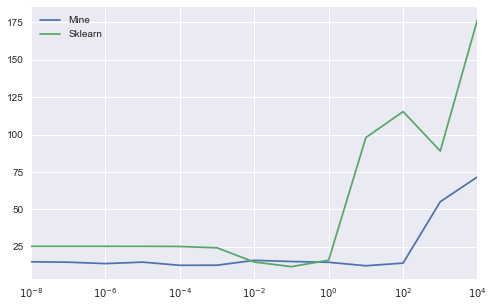

In [474]:
mses.plot(logx=True) 

*"(e) Now generate a response vector Y according to the model Y = β0 + β7X7 + ε. Fit a LASSO model using your own coordinate descent algorithm and scikit-learn’s LASSO algorithm. Discuss the results obtained."*

In [495]:
b7 = 12
new_y = b0 + (b7*(X[:,0]**7)) + e
print(new_y.shape)

(100,)


In [496]:
new_y_centered = preprocessing.scale(new_y, with_std=False)
np.mean(new_y_centered), np.std(new_y_centered)

(2.7739588404074311e-13, 9827.125459718427)

In [503]:
# setting lambda to the highest value that gave low MSEs for both
# my implementation and sklearn
optimal_lambda = 1 

beta_init = np.zeros(np.size(X_scaled_poly10, 1))
betas_rand = cd.randcoorddescent(beta_init, X_scaled_poly10, new_y_centered, 
                                 optimal_lambda, max_iter)
print(betas_rand[-1,:])
print(mse_from_beta_coefs(betas_rand[-1, :], X_scaled_poly10, new_y_centered))

[  3.51547618e+03   2.50810819e+03  -1.60501414e+03  -1.51295923e+03
  -4.61899979e+01   8.73073527e+01   4.89411401e+01   3.28217014e+01
   1.10645710e+00  -1.53477527e+00]
93851286.3787


In [505]:
results_sklearn = Lasso(alpha=optimal_lambda, fit_intercept=False, 
                        max_iter=10000000).fit(X_scaled_poly10, new_y_centered)
print(results_sklearn.coef_)
print(mse_from_beta_coefs(results_sklearn.coef_, X_scaled_poly10, new_y_centered))

[ 2261.84105254  4506.11280851  3301.15814662 -3921.22788106 -4678.16278065
   474.87411895  1578.32380246   200.6517575   -161.45674055   -36.63833918]
93378652.1551


# Exercise Four

**TODO** Something and note here.

# Exercise Five

**TODO** Possibly just refer to what I submitted last week, unless something's changed.

* Is there a concept you would love to see covered during the course?
* Is there a concept that has been used multiple times during the course, but you still have no idea what it means?
* Do you feel that you learn better when the course material is covered using slides, or tablet/whiteboard, or numerical illustrations?